In [1]:
import pandas as pd
import numpy as np
import csv
import platform

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [3]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [4]:
# 한글 폰트 사용시 레이블의 '-' 기호 깨지는 현상 해결
plt.rc('axes', unicode_minus = False)  # plt.rcParams['axes.unicode_minus'] = False와 동일

In [15]:
data_file = '../DATA/daegu.csv'

#### 순서
- CSV 모듈을 불러옴 (import csv)
- 파일 open('파일이름', mode = 'r', encoding = None)
- csv reader 객체 생성 및 파일 읽어 오기
- 읽은 데이터(data 변수) 출력
- 파일 close()

In [16]:
import csv

f = open(data_file, 'r', encoding = 'utf-8')
data = csv.reader(f, delimiter = ',')  # delimiter : 구분자(','), csv파일은 delimiter 생략 가능
print(data)
f.close()

In [21]:
# 출력 오류
f = open(data_file, 'r', encoding = 'cp949')
data = csv.reader(f, delimiter = ',')
count = 0
for row in data:
    if count > 5:
        break
    else:
        print(row)
    count += 1

f.close()    

['기온분석']
['[검색조건]']
['자료구분 : 일']
['자료형태 : 기본']
['지역/지점 : 대구']
['기간 : 19040101~20231231']


In [24]:
# encoding = 'utf-8-sig'로 '\ufeff' 제거
fin = open(data_file, 'r', encoding = 'utf-8-sig')
data = csv.reader(fin, delimiter = ',')

# newline = '' : 한 라인씩 건너 뛰며 저장되는 현상 없앰
fout = open('daegu-utf8.csv', 'w', newline = '', encoding = 'utf-8-sig')
wr = csv.writer(fout)

for row in data:
    for i in range(len(row)):
        row[i] = row[i].replace('\t', '')
    print(row)
    wr.writerow(row)  # writerow(row) : 한 행씩 파일로 저장

fin.close()
fout.close()
print('파일 저장 완료')

파일 저장 완료


In [25]:
data_file2 = '../DATA/daegu-utf8.csv'

In [26]:
# csv 파일에서 한 라인씩 데이터 출력
f = open(data_file2)
data = csv.reader(f, delimiter = ',')
header = next(data)
print(header)

i = 1
for row in data:
    print(row)
    if i >= 5:
        break
    i += 1

f.close()

['\ufeff날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['1907-01-31', '143', '', '-7', '0.8']
['1907-02-01', '143', '', '', '']
['1907-02-02', '143', '', '', '']
['1907-02-03', '143', '', '', '']
['1907-02-04', '143', '', '', '']


In [27]:
def get_minmax_temp(data):
    '''
        최고기온 및 최저기온의 날짜 구하기
    '''
    header = next(data)

    min_temp = 100
    min_date = ''

    max_temp = -999
    max_date = ''

    for row in data:
        if row[3] == '':
            row[3] = 100
        row[3] = float(row[3])

        if row[4] == '':
            row[4] = -999
        row[4] = float(row[4])

        # 최저 기온 계산
        if row[3] < min_temp:
            min_temp = row[3]
            min_date = row[0]

        # 최고 기온 계산
        if row[4] > max_temp:
            max_temp = row[4]
            max_date = row[0]  # 날짜 : index[0]
        
    print('-'*50)
    print(f'대구 최저기온 날짜 : {min_date}, 온도 : {min_temp}')
    print(f'대구 최고기온 날짜 : {max_date}, 온도 : {max_temp}')


def main():
    f = open(data_file2, encoding = 'utf-8-sig')
    data  =csv.reader(f)
    get_minmax_temp(data)
    f.close()

main()

--------------------------------------------------
대구 최저기온 날짜 : 1923-01-19, 온도 : -20.2
대구 최고기온 날짜 : 1942-08-01, 온도 : 40.0


42074


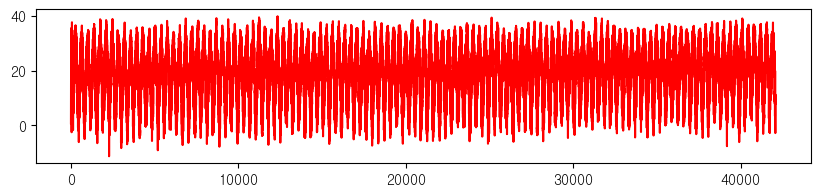

In [28]:
f = open(data_file2, encoding = 'utf-8-sig')
data = csv.reader(f)

header = next(data)
result = []

for row in data:
    if row[4] != '':  # 최고기온 데이터 값이 있으면, 리스트에 저장
        result.append(float(row[4]))

print(len(result))
f.close()
plt.figure(figsize = (10, 2))  # 그래프 크기 조절
plt.plot(result, 'r')  # result 리스트에 저장된 값을 빨간색으로 그리기
plt.show()  # 그래프 그리기

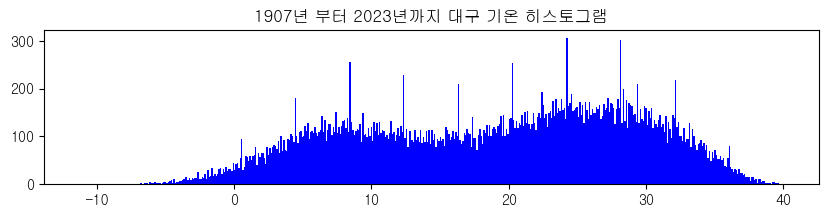

In [29]:
f = open(data_file2, encoding = 'utf-8-sig')
data = csv.reader(f)
next(data)
result = []

for row in data:
    if row[-1] != '':
        result.append(float(row[-1]))

f.close()

plt.figure(figsize = (10, 2))
plt.hist(result, bins = 500, color = 'blue')
plt.rc('font', family = 'Malgun Gothic')
plt.title('1907년 부터 2023년까지 대구 기온 히스토그램')
plt.show()

In [30]:
# 문자열 분리 : split('구분자')
date_string1 = '2024 01 01'
# 공백을 기준으로 분리
print(date_string1.split())

# 구분자 : '-' 기준으로 분리
date_string2 = '2023-12-31'
split_date_string = date_string2.split('-')
print(split_date_string)

year = split_date_string[0]
month = split_date_string[1]
day = split_date_string[2]

print(f'연도 : {year}, 월 : {month}, 일 : {day}')

['2024', '01', '01']
['2023', '12', '31']
연도 : 2023, 월 : 12, 일 : 31


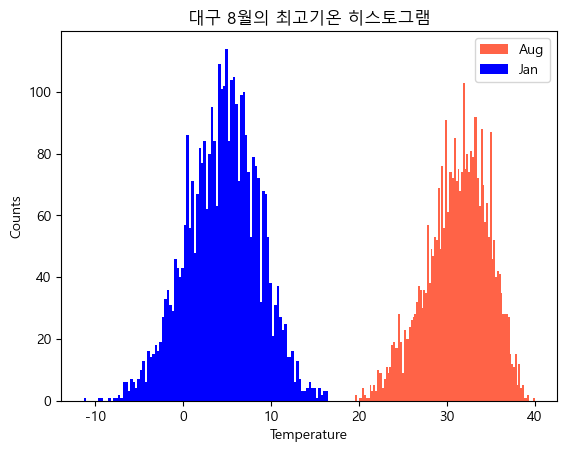

In [31]:
f = open(data_file2, encoding = 'utf-8-sig')
data = csv.reader(f)
next(data)
aug = []
jan = []

for row in data:
    month = row[0].split('-')[1]
    if row[-1] != '':
        if month == '08':
            aug.append(float(row[-1]))
        if month == '01':
            jan.append(float(row[-1]))

f.close()
plt.hist(aug, bins = 100, color = 'tomato', label = 'Aug')
plt.hist(jan, bins = 100, color = 'b', label = 'Jan')
plt.title('대구 8월의 최고기온 히스토그램')
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.legend()
plt.show()

#### 매년 특정 날짜의 최고기온 찾기 <hr>

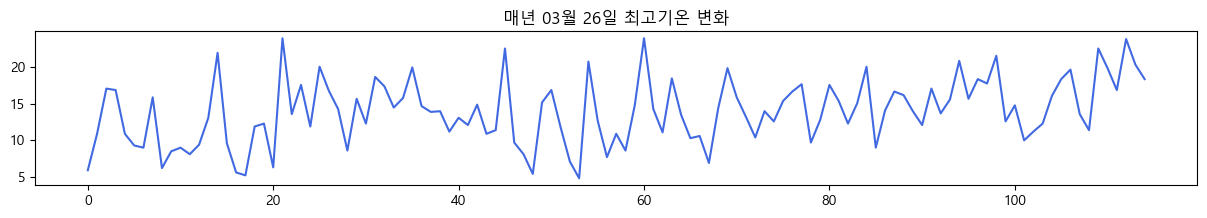

In [33]:
def draw_graph_on_date(month, day):
    f = open(data_file2, encoding = 'utf-8-sig')
    data = csv.reader(f)
    next(data)
    result = []
    for row in data:
        if row[-1] != '':
            date_string = row[0].split('-')
            if date_string[1] == month and date_string[2] == day:
                result.append(float(row[-1]))
    
    f.close()
    plt.figure(figsize = (15, 2))
    plt.plot(result, 'royalblue')
    # plt.rc('axes', unicode_minus = False)
    plt.rc('font', family = 'Malgun Gothic')
    plt.title(f'매년 {month}월 {day}일 최고기온 변화')
    plt.show()

month, date = input('날짜(월 일)를 입력하세요 : ').split()
draw_graph_on_date(month, date)


#### 2000년 이후 특정일의 최저, 최고기온 찾기 <hr>

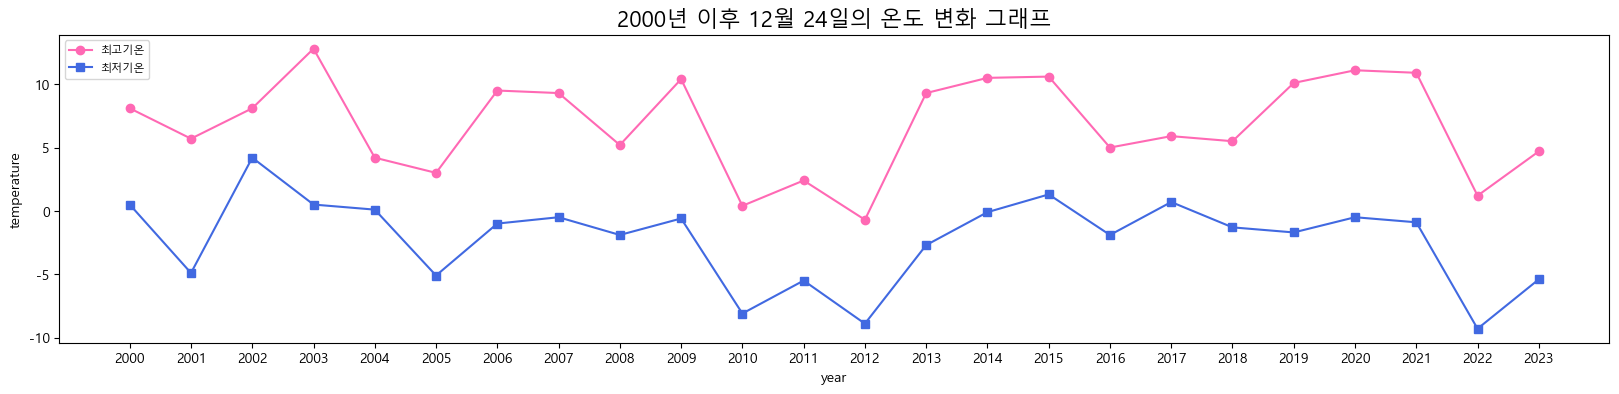

In [34]:
def draw_lowhigh_graph(start_year, month, day):
    f = open(data_file2, encoding = 'utf-8-sig')
    data = csv.reader(f)
    next(data)
    high_temp = []
    low_temp = []
    x_year = []
    for row in data:
        if row[-1] != '':
            date_string = row[0].split('-')  # 날짜 데이터를 미리 분리함
            if int(date_string[0]) >= start_year:
                if int(date_string[1]) == month and int(date_string[2]) == day:
                    high_temp.append(float(row[-1]))
                    low_temp.append(float(row[-2]))
                    x_year.append(date_string[0])  # 연도 저장
                  # 문자열 값을 int형으로 변환해서비교
    
    
    f.close()
    plt.figure(figsize = (20, 4))
    plt.plot(x_year, high_temp, 'hotpink', marker = 'o', label = '최고기온')
    plt.plot(x_year, low_temp, 'royalblue', marker = 's', label = '최저기온')
    # plt.rc('axes', unicode_minus = False)
    if platform.system() == 'Windows':
        plt.rc('font', family = 'Malgun Gothic', size = 8)  # 간단히 맑은 고딕으로 사용
    else:
        plt.rc('font', family = 'AppleGothic', size = 8)  # 한글 폰트 사용 For Mac OS
    

    plt.title(f'{start_year}년 이후 {month}월 {day}일의 온도 변화 그래프', size = 16)
    plt.legend(loc = 2)
    plt.xlabel('year')
    plt.ylabel('temperature')
    plt.show()

year, month, date = input('날짜(연도 월 일)를 입력하세요 : ').split()
draw_lowhigh_graph(2000, 12, 24)